# Orthogonal Collocation Problem

### ODE Equations

$$
\begin{align*}
5 \frac{d x_{1}}{d t}[.5]&=-x_{1}[.5]+2 u^{2} \\
5 \frac{d x_{1}}{d t}[1.0]&=-x_{1}[1.0]+2 u^{2} \\
3 \frac{d x_{2}}{d t}[.5]&=-x_{2}[.5]+x_{1}^{2}[.5] \\
3 \frac{d x_{2}}{d t}[1.0]&=-x_{2}[1.0]+x_{1}^{2}[1.0]
\end{align*}
$$

### Collocation Equations

$$
\begin{aligned}
&N\left[\begin{array}{l}
\frac{d x_{1}}{d t}[.5] \\
\frac{d x_{2}}{d t}[1.0]
\end{array}\right]=\left[\begin{array}{l}
x_{1}[.5] \\
x_{1}[1.0]
\end{array}\right]-\left[\begin{array}{l}
0 \\
0
\end{array}\right] \\
&N\left[\begin{array}{l}
\frac{d x_{2}}{d t}[.5] \\
\frac{d x_{2}}{d t}[1.0]
\end{array}\right]=\left[\begin{array}{l}
x_{2}[.5] \\
x_{2}[1.0]
\end{array}\right]-\left[\begin{array}{l}
1 \\
1
\end{array}\right]
\end{aligned}
$$

### KKT Condition

$$
\begin{aligned}
&\frac{d J}{d x}=2\left[x_{2}[1.0]-5\right]=0 \\
&\Rightarrow x_{2}[1.0]-5=0 \Rightarrow x_{2}[1.0]=5
\end{aligned}
$$

In [4]:
import numpy as np
N = np.array([[.75,-.25],[1,0]])

time = np.array([0.0, 0.5,1.0])

from scipy.optimize import fsolve

# multi start guess
for i in range(10):
    zGuess = np.random.uniform(-5,5,9) # initial guess at solution

    def myFunction(z):
        #unpack everything
        u = z[0]
        x11 = z[1]
        x12 = z[2]
        x21 = z[3]
        x22 = z[4]
        dx11 = z[5]
        dx12 = z[6]
        dx21 = z[7]
        dx22 = z[8]

        #useful forms
        x1 = np.array([x11,x12])
        x2 = np.array([x21,x22])
        dx1 = np.array([dx11,dx12])
        dx2 = np.array([dx21,dx22])

        F = np.empty(9)

        #ode equations, solved for 0
        F[0] = 5*dx11 + x11 - 2*u**2
        F[1] = 5*dx12 + x12 - 2*u**2
        F[2] = 3*dx21 + x21 - x11**2
        F[3] = 3*dx22 + x22 - x12**2
        #collocation equations
        F[4:6] = N @ dx1 - (x1 - np.zeros(2))
        F[6:8] = N @ dx2 - (x2 - np.ones(2))
        #kkt condition
        F[-1] = x22 - 5.0
        return F

    z = fsolve(myFunction,zGuess)
    if z[4] == 5:
        print('\nVALID SOLUTION')
        print('u:',z[0])
        print('x1[.5]:',z[1])
        print('x1[1]:',z[2])
        print('x2[.5]:',z[3])
        print('x2[1]:',z[4])
        print('dx1[.5]:',z[5])
        print('dx1[1]:',z[6])
        print('dx2[.5]:',z[7])
        print('dx2[1]:',z[8])
    else:
        print("\nKKT Condition Not Met")


VALID SOLUTION
u: -4.325565570825377
x1[.5]: 3.548546423838106
x1[1]: 6.7744977182363835
x2[.5]: 0.5921817221348703
x2[1]: 5.0
dx1[.5]: 6.7744977182363835
dx1[1]: 6.1293074593567285
dx2[.5]: 4.0
dx2[1]: 13.63127311146052

VALID SOLUTION
u: 4.32556557082712
x1[.5]: 3.548546423838189
x1[1]: 6.7744977182365425
x2[.5]: 0.5921817221335683
x2[1]: 5.0
dx1[.5]: 6.7744977182365425
dx1[1]: 6.129307459356871
dx2[.5]: 4.0
dx2[1]: 13.631273111465726

KKT Condition Not Met

VALID SOLUTION
u: 4.325565570824335
x1[.5]: 3.5485464238360693
x1[1]: 6.774497718232496
x2[.5]: 0.5921817221318172
x2[1]: 5.0
dx1[.5]: 6.774497718232496
dx1[1]: 6.12930745935321
dx2[.5]: 4.0
dx2[1]: 13.631273111472732

KKT Condition Not Met

KKT Condition Not Met

KKT Condition Not Met

VALID SOLUTION
u: -4.325565570979858
x1[.5]: 3.5485464244110707
x1[1]: 6.774497719330226
x2[.5]: 0.5921817218914481
x2[1]: 5.0
dx1[.5]: 6.774497719330226
dx1[1]: 6.129307460346395
dx2[.5]: 4.0
dx2[1]: 13.631273112434208

VALID SOLUTION
u: 4.32556

C:\Users\curti\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


From random multistarting, sometimes the KKT condition isn't met. But when it is, the it looks like there are 2 u values that give identical solutions:

u = 4.3255 and u = -4.3255 (likely because the u value is squared in the x1 dynamics)

# Dynamic Optimization Problem

$$
\begin{aligned}
\min _{u} \quad J=\frac{1}{2} \int_{0}^{1} u^{2}(t) d t & \\
\text { s.t. } \frac{d x(t)}{d t} &=v(t) \\
\frac{d v(t)}{d t} &=u(t) \\
x(0) &=x(1)=0 \\
v(0) &=1 \\
v(1) &=-1 \\
x(t) &<\frac{1}{9}
\end{aligned}
$$

1

Boundary Conditions
x[0],v[0] = 0.0,1.0
x[tf],v[tf] = -8.8860674421e-24,-1.0
Objective Function
900005.40766
x(t) max violation: -1.1111112030448567e-12
1

Boundary Conditions
x[0],v[0] = 0.0,1.0
x[tf],v[tf] = 1.509312279e-22,-1.0
Objective Function
9900004.0098
x(t) max violation: -1.1111112030448567e-12
1

Boundary Conditions
x[0],v[0] = 0.0,1.0
x[tf],v[tf] = -1.0370955308e-19,-1.0
Objective Function
49900004.004
x(t) max violation: -1.1111112030448567e-12


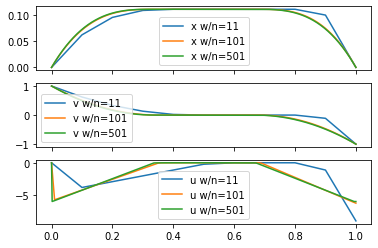

In [60]:
from gekko import GEKKO
import matplotlib.pyplot as plt
import numpy as np
fig,ax = plt.subplots(3,1,sharex=True)
n_list = [11,101,501]
for n in n_list: 
    m = GEKKO()

    tf = 1
    m.time = np.linspace(0,tf,n)

    #variables and their ICs
    x = m.Var(0,ub=1./9)
    v = m.Var(1)
    u = m.MV(0)
    u.STATUS = 1

    p = np.zeros(n)
    p[-1] = 1
    final = m.Param(p)

    # apply boundary conditions
    # results in infeasible solution
    # m.fix_final(x,val=0)
    # m.fix_final(v, val=-1)

    # #infeasible
    # m.fix(x,pos=n-1,val=0)
    # m.fix(v,pos=n-1,val=-1)

    #needs penalty to avoid infeasible solution x1*final == 1 (because of all the 0s in final, 0 = -1)
    m.Equation(x*final == 0)
    m.Equation((v+1)*final == 0)

    #search for final condition -> jennings problem on class website. 

    #feasible solution at least, cost on x(tf) not being close to 0 and v(tf) not being close to -1. 
    # Small boundary condition violation, but gets us to right area for optimizer.
    m.Minimize(100000*(x*final)**2)
    m.Minimize(100000*(v*final+1)**2)


    m.Equation(x.dt() == v)
    m.Equation(v.dt() == u)

    #m.integral is running integral, only want total integral over whole horizon
    m.Minimize(0.5*m.integral(u**2) * final)

    m.options.IMODE = 6
    m.options.NODES = 2
    # print(m.options.NODES)

    m.solve(disp=False)


    ax[0].plot(m.time, x, label=f'x w/n={n}')
    ax[0].legend()
    ax[1].plot(m.time, v, label=f'v w/n={n}')
    ax[1].legend()
    ax[2].plot(m.time, u,label=f'u w/n={n}')
    ax[2].legend()


    print("\nBoundary Conditions")
    print(f'x[0],v[0] = {x.VALUE[0]},{v.VALUE[0]}')
    print(f'x[tf],v[tf] = {x.VALUE[-1]},{v.VALUE[-1]}')

    print("Objective Function")
    print(m.options.OBJFCNVAL)

    print('x(t) max violation:',np.max(x.VALUE) - 1/9.)



Looks like 101 and 501 are pretty close, so grid on time points is tight enough. Though not plotted, I tried 1001 and it's right on top of 501. I also tried increasing the number of collocation nodes from the default, but this always caused an infeasible solution. Only 1 and 2 nodes work. 

9900004.0098 is objective function value with 101 time points and default nodes. The objective function value was 9900004.0098 for 101 time points and 1 node, so 2 nodes is enough. 

Solution with a hard constaint of fixing the final values was infeasible. By softening this and adding a large cost to the objective function for being away from the boundary conditions, I got pretty close (see printout above). And then from there, the optimizer is able to satisfy the hard constraints. 

It also looks like the constraint on x < 1/9 was an active constraint. The maximum value over the horizon was .1111111 = 1/9.

# Parameter Regression/ Machine Learning

apm 10.37.232.20_gk_model76 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            0
   Constants    :            0
   Variables    :            6
   Intermediates:            0
   Connections  :            0
   Equations    :            4
   Residuals    :            4
 
 Number of state variables:            614
 Number of total equations: -          612
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :              2
 
 **********************************************
 Dynamic Estimation with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains I

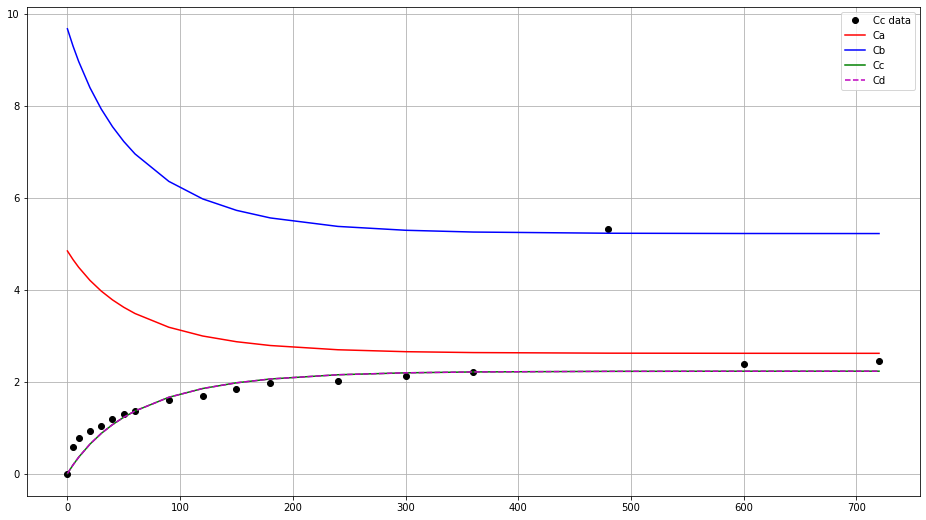

In [51]:
from gekko import GEKKO
import matplotlib.pyplot as plt
#data 
t_data = [0, 5, 10, 20, 30, 40, 50, 60, 90, 120, 150, 180, 240, 300, 360, 480, 600, 720]
Cc_data = [0.00, 0.57, 0.78, 0.92, 1.04, 1.19, 1.29, 1.36, 1.59, 1.68, 1.84, 1.96, 2.01, 2.13, 2.21, 5.32, 2.38, 2.44]

m = GEKKO()
m.time = t_data

#kinetic parameters to estimate
Kf = m.FV(.005,lb = 0, ub = .01)
Kf.STATUS = 1
Kf.FSTATUS = 0 #no measurments here like i have for Cc
Kb = m.FV(.005,lb = 0, ub = .01)
Kb.STATUS = 1
Kb.FSTATUS = 0


#variables
Ca = m.Var(4.84)
Cb = m.Var(9.67)
Cd = m.Var(0)

#measurements to align model
Cc = m.CV(value=Cc_data)
Cc.FSTATUS = 1 #use measurement
Cc.STATUS = 1 #minimize error between sim and measurements on this variable.

#equations
m.Equation(Cc.dt() == Kf * Ca * Cb**2 - Kb*Cc*Cd)
m.Equation(Ca.dt() == -Cc.dt())
m.Equation(Cb.dt() == -2*Cc.dt())
m.Equation(Cd.dt() == Cc.dt())


#options
m.options.IMODE = 5
m.options.NODES = 4
m.options.EV_TYPE = 1

m.solve()

plt.figure(figsize=(16,9))
plt.plot(t_data, Cc_data, 'ko', label='Cc data')
plt.plot(m.time, Ca, 'r',label="Ca")
plt.plot(m.time, Cb, 'b', label = "Cb")
plt.plot(m.time, Cc, 'g',label ="Cc")
plt.plot(m.time, Cd, 'm--', label = "Cd")
plt.grid(True)
plt.legend()

print('Estimated Kinetic Constants')
print(f'Kf: {Kf.VALUE[-1]}, Kb: {Kb.VALUE[-1]}')


I used the MV_TYPE = 1 for the l1 objective. The Cc estimate is shifted upwards towards the outlier when I use the squared objective. 